# Example

A simple example of the presented ABC method for a 2d Gauss.

All necessary functions are described.

In [46]:
import numpy as np
import scipy as scp
import scipy.stats

import matplotlib.pyplot as plt

## Specify model

In [185]:
"""
Example: 2d Gauss distribution
"""

def model(params):
    # specify fixed covariance matrix
    cov = np.eye(2)*2
    cov[0,1] = -0.8
    cov[1,0] = cov[0,1]
    # "evaluate" model
    x = scp.stats.multivariate_normal.rvs(params,cov=cov)
    return x

"""
produce some data, from which we want to infer the mean parameteres
"""

# specify dimension and number of datapoints
dim_data = 2
ndata = 100

# specify true means
true_mean = np.array([1,5]) # length of dim_data

# produce data
data = np.zeros((ndata, dim_data))
for i in range(ndata):
    data[i] = model(true_mean)


(-10, 10)

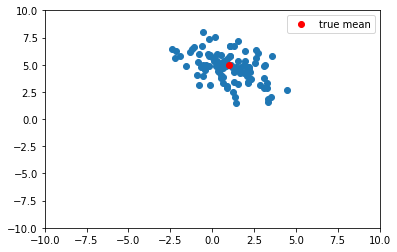

In [168]:
"""
show data
"""
plt.plot(data[:,0],data[:,1], 'o')
plt.plot(true_mean[0], true_mean[1],'o', color='r', label='true mean')
plt.legend()
plt.xlim(-10,10)
plt.ylim(-10,10)

## Specify summary statistics and loss function

This is very model specific. There is a lot of literature on how to choose meaningful summary statistics. Including dimensionality reduction of summary statistics and automatic extraction.
See for example "Handbook of Approximate Bayesian Computation" (Sisson, Fan, Beaumont, 2019).

Here we just use the identity as summary statistic and the MSE to the observed data as loss function.

In [186]:
"""
summary statistic and loss
"""

def extract_sumstat(trace):
    return trace

def loss(traces, sumstat_data):
    # extract summary stats for traces
    sumstat_traces = extract_sumstat(traces)
    
    n = len(sumstat_data)
    m = len(sumstat_traces)
    
    # mean of pairwise distance
    MSE_pairwise = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            MSE_pairwise[i,j] = 1/(len(sumstat_data[0]))* np.sum( (sumstat_data[i]-sumstat_traces[j])**2)
                
    return np.mean(MSE_pairwise)


# extract summary statistics for data
sumstat_data = extract_sumstat(data)

In [190]:
# evaluate model

params = [-3,-5]
ntraces = 50
traces = np.zeros((ntraces, dim_data))
for i in range(ntraces):
    traces[i] = model(params)


print('Loss of true params:',loss(data, sumstat_data))
print('Loss of some params:',loss(traces, sumstat_data))

Loss of true params: 4.348253805621021
Loss of some params: 62.058619865427644


(-10, 10)

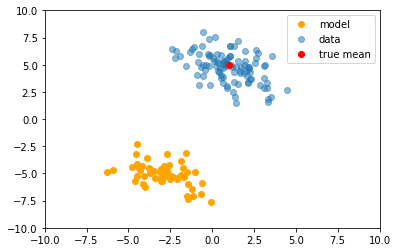

In [183]:
"""
show data and model evaluations
"""
plt.plot(traces[:,0],traces[:,1], 'o', color='orange', label='model')

plt.plot(data[:,0],data[:,1], 'o', label='data', alpha=0.5)

plt.plot(true_mean[0], true_mean[1],'o', color='r', label='true mean')
plt.legend()
plt.xlim(-10,10)
plt.ylim(-10,10)